<a href="https://colab.research.google.com/github/danaigkritz/MLF/blob/main/lab_18_Feb_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [2]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [3]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9333333333333333

In [4]:
X=iris.data[:,0:2]
X.shape

(150, 2)

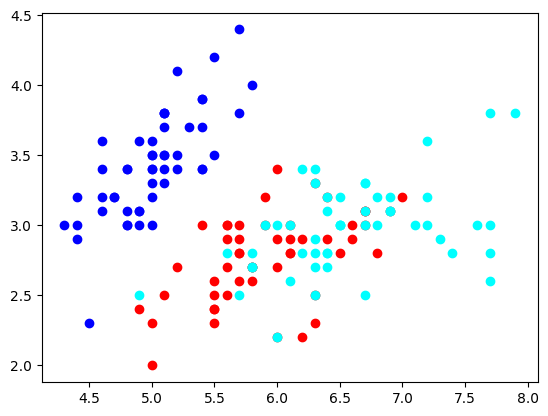

In [5]:
import matplotlib.pyplot as plt
#plt.scatter(X[:,0],[:,1])
plt.scatter(X[y==0,0],X[y==0,1],color='blue')
plt.scatter(X[y==1,0],X[y==1,1],color='red')
plt.scatter(X[y==2,0],X[y==2,1],color='cyan')

In [6]:
X=iris.data[iris.target!=2,0:2]
print(X.shape)
y=iris.target[iris.target!=2]
SVModel_1=SVC(kernel='linear')

X_train_1, X_test_1, y_train_1, y_test_1=train_test_split(X,y,test_size=0.2)
SVModel_1.fit(X_train_1,y_train_1)
print(SVModel_1.get_params())
SVModel_1.score(X_test_1,y_test_1)

(100, 2)
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


1.0

[[ 2.22218574 -2.22249846]]
[-4.99892951]


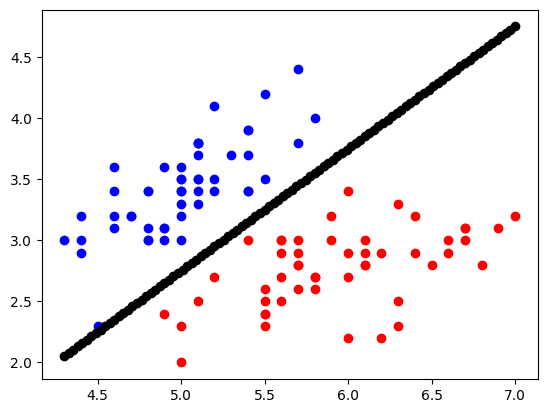

In [7]:
supervectors=SVModel_1.support_vectors_
#plot the support vectors here

#seprating line coefficients
W=SVModel_1.coef_
b=SVModel_1.intercept_
print(W)
print(b)
import numpy as np
x1=np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2=-b/W[0,1]-W[0,0]/W[0,1]*x1
plt.scatter(X[y==0,0],X[y==0,1],color='blue')
plt.scatter(X[y==1,0],X[y==1,1],color='red')
plt.scatter(x1,x2,color='black')



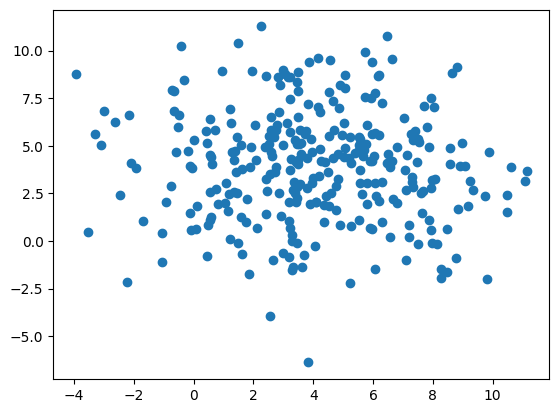

In [8]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x,_=make_blobs(n_samples=300, centers=1, cluster_std=3,center_box=(4,4))
plt.scatter(x[:,0],x[:,1])
plt.show()

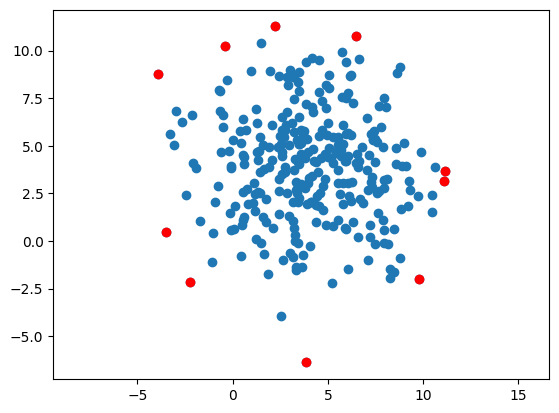

In [9]:
SVModelOne=OneClassSVM(kernel='rbf',gamma=0.001,nu=0.03)

SVModelOne.fit(x)
pred=SVModelOne.predict(x)
anom_index=where(pred==-1)
values=x[anom_index]

plt.scatter(x[:,0],x[:,1])
plt.scatter(values[:,0],values[:,1],color='red')
plt.axis('equal')
plt.show()

[8.12806873 8.33633102 8.31911174 8.33908168 8.31694586 8.27280373
 8.23927314 8.15045558 8.17369926 8.36911477 8.39836545 8.35270101
 7.96555148 8.20153389 8.31808809 8.33865001 8.31049877 8.38645881
 8.2079313  8.26299757 8.39056211 8.33604276 8.0256992  8.39508183
 8.34111414 8.34603819 7.95229424 8.23436928 8.18246771 8.31933813
 8.21517367 7.99375489 8.01461973 8.25462985 8.38441068 8.26539447
 8.35640039 7.95723027 8.22734148 8.132036   8.13683599 8.37455261
 8.17453447 8.20013249 8.00794964 8.3482003  8.3879758  8.3051684
 8.12701949 8.35403118 8.14311024 8.356207   8.02904267 8.40319148
 8.35648804 8.38432765 8.3680276  8.34306607 8.21622757 8.39960477
 8.36868923 8.10131759 8.40211056 8.30606327 8.29656021 8.38310616
 8.36012399 8.40215698 8.23603453 8.11878527 8.36125361 8.39873371
 8.38842724 8.39240106 8.14305654 8.17167114 8.24138434 8.35581529
 7.79134485 7.95757319 8.2416725  8.14020684 8.32979411 8.26188552
 8.37138996 8.37839137 8.38678116 8.36907129 8.12651101 8.29925

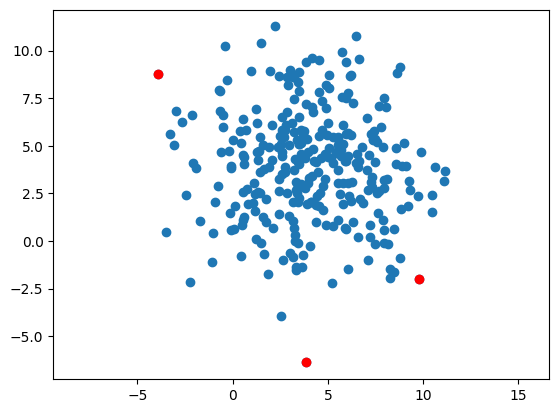

In [10]:
#scores

scores=SVModelOne.score_samples(x)
print(scores)
thresh=quantile(scores,0.01)
print(thresh)
index=where(scores<=thresh)
values=x[index]
plt.scatter(x[:,0],x[:,1])
plt.scatter(values[:,0],values[:,1],color='red')
plt.axis('equal')
plt.show()